## Введение

    Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
    
    

In [1]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import datetime

RANDOM_STATE = 50623


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Предобработка данных

#### 1 таблица

In [2]:
# Рассмотри первую таблицу
df_contract = pd.read_csv('contract_new.csv')
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [3]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [4]:
# посмотрим инфу по таблице
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [5]:
# проверим на пропуски
df_contract.isna().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [6]:
df_contract = df_contract.dropna()

In [7]:
# проверим на пропуски
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
# проверим на дубликаты
df_contract.duplicated().sum()

0

#### 2 таблица

In [9]:
df_internet = pd.read_csv('internet_new.csv')
df_internet. head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
# посмотрим инфу по таблице
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
# проверим на пропуски
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [12]:
# проверим на дубликаты
df_contract.duplicated().sum()

0

#### 3 таблица

In [13]:
df_personal = pd.read_csv('personal_new.csv')
df_personal. head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
# посмотрим инфу по таблице
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
# проверим на пропуски
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [16]:
# проверим на дубликаты
df_contract.duplicated().sum()

0

#### 4 таблица

In [17]:
df_phone = pd.read_csv('phone_new.csv')
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [18]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [19]:
# проверим на пропуски
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [20]:
# проверим на дубликаты
df_phone.duplicated().sum()

0

### Предварительные выводы:

1. нам на вход поступает 4 таблицы, у которых есть один общий столбец - 'customerID'
2. пропусков и явных дубликатов в данных нет
3. важно отметить, что у таблиц разное количество строк. Это означает, что при объединениии мы бeдем объединять сначала те, у которх строк больше.
4. у признаков неудобный для работы тип данных, мы это пока просто учтем и вернемся к этому вопросу позже.

#### Oбъединение таблиц

In [21]:
# Сначала объединим df_contract и df_personal. Форма итоговой таблицы должна быть: 7043 Х 12
df_2 = df_contract.merge(df_personal, on = 'customerID')
df_2.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No


In [22]:
df_2.shape

(7032, 12)

In [23]:
# Далее присоединяем df_phone. Форма получившейся таблицы должна быть 6361 Х 13
df_3 = df_2.merge(df_phone, on = 'customerID', how = 'left')
df_3.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,No


In [24]:
df_3.shape

(7032, 13)

In [25]:
# Далее присоединяем df_internet. Форма получившейся таблицы должна быть 5517 Х 20
df = df_3.merge(df_internet, on = 'customerID', how= 'left')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [26]:
df.shape

(7032, 20)

In [27]:
#### После объединения посмотрим на пропуски
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        680
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
dtype: int64

In [28]:
# Мы видим, что количество пропусков объясняеся разницей в размерах таблиц. Заполним их заглушкой "no_info"
df = df.fillna('no_info')
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [29]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

##### Напрашивается создать еще один столбец - время пользования услугой

In [30]:
# 1 шаг - скопируем и добавим столбец endate
df['enddate_2'] = df['enddate']



In [31]:
# 2 шаг - значеения NO заменим на сегодняшнюю дату
df.loc[df['enddate_2']== 'No', 'enddate_2'] = '2020-02-01'



In [32]:
# 3 -приведем интересующие столбцы в формат datetime
df['begindate'] = pd.to_datetime(df['begindate'])
df['enddate_2'] = pd.to_datetime(df['enddate_2'])

In [33]:
df.head(10)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,enddate_2
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,no_info,DSL,No,Yes,No,No,No,No,2020-02-01
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,2020-02-01
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,2020-02-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,no_info,DSL,Yes,No,Yes,Yes,No,No,2020-02-01
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,2020-02-01
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,...,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,2020-02-01
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,2020-02-01
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,...,No,no_info,DSL,Yes,No,No,No,No,No,2020-02-01
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,...,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,2020-02-01
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,...,Yes,No,DSL,Yes,Yes,No,No,No,No,2017-05-01


In [34]:
# 4 - создадим столбец с раздностью времен
df['length'] = (df['enddate_2'] - df['begindate']).dt.days

In [35]:
df.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,enddate_2,length
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,no_info,DSL,No,Yes,No,No,No,No,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,2020-02-01,1036
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,2020-02-01,123
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,no_info,DSL,Yes,No,Yes,Yes,No,No,2020-02-01,1371
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,2020-02-01,153


In [36]:
# 6 - удалим временный столбец
df = df.drop('enddate_2', axis=1)

### Предобработка данных: выводы

1. таблицы объеденины по общему столбцу: 'customerID'
2. пропусков и явных дубликатов нет
3. к сожалению, во время объединения мы потеряди часть данных
4. Добавили столбец с длительностью пользования


## Исследовательский анализ данных

Начать анализ данных хочется с определения целевого признака исследования. Так как нам нужно определеить, кто из клиентов вероятнее всего уйдет от нас, то "таргетом" будет выступать столбец 'enddate'. Сейчас он представлен в виде строки, давайте на него посмотрим. Все значения 'NO' заменим на 0, а вcе другие - на 1.


In [37]:
df.loc[df['enddate'] == 'No', 'enddate'] = 0
df.loc[df['enddate'] != 0, 'enddate'] = 1

print(df['enddate'].value_counts())

0    5931
1    1101
Name: enddate, dtype: int64


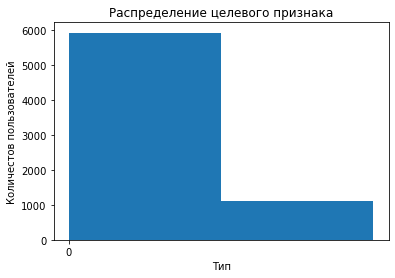

In [38]:
plt.hist(df['enddate'], bins=2)
plt.xticks(np.arange(0,1))
plt.title('Распределение целевого признака')
plt.xlabel('Тип')
plt.ylabel('Количестов пользователей')
plt.show()

Итак мы видим следующее:
    
    1. Клиенты от нас все таки уходят. Их доля составляет около 1/5 от общего числа клиентов.
    
    3. Теперь наше исследование однозначно стало задачей бинарной классификации. 

#### Дальнейший анализ предлагаю рассмотреть в сравнении: для оставшихся и для ушедших клиентов:


In [39]:
# Рассмотрим стобцы по порядку: Type. Здесь указан тип оплаты. Рассмотрим значения:
df['type'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: type, dtype: int64

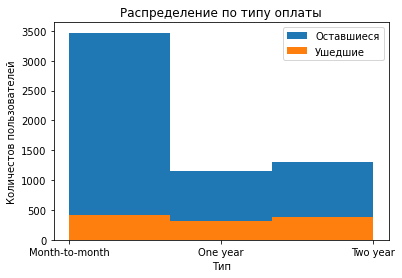

In [40]:
plt.hist(df.loc[df['enddate']==0]['type'], bins=3)
plt.hist(df.loc[df['enddate']==1]['type'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по типу оплаты')
plt.xlabel('Тип')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По типу опалыт клиенты делятся на три группы: по месяцам, по году, по 2 года. (доли 0.2 / 0.2 / 0.6)
    2. Большая часть клиентов выбирает оплату по месяцам
    3. Распредедения клиентов по типам среди оставшихся и среди ушедших очень похожи.

In [41]:
# Далее: peperlessbilling. В этом признаке указано наличие безналичной оплаты. Рассмотрим значения:
df['paperlessbilling'].value_counts()

Yes    4168
No     2864
Name: paperlessbilling, dtype: int64

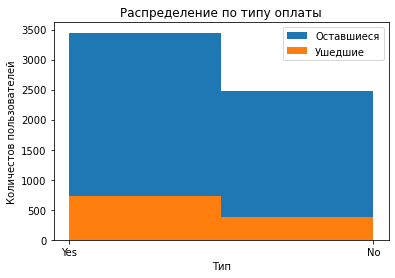

In [42]:
plt.hist(df.loc[df['enddate']==0]['paperlessbilling'], bins=2)
plt.hist(df.loc[df['enddate']==1]['paperlessbilling'], bins=2)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по типу оплаты')
plt.xlabel('Тип')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По наличию электронного платежного документа клиенты делятся на 2 группы: есть или нет. (Доли примерно 2/1)
    2. Большая часть клиентов выбирает электронного платежный документ.
    3. Распредедения клиентов по типам среди оставшихся и среди ушедших очень похожи.

In [43]:
# Далее: PaymentMethod . В этом признаке указан способ оплаты. Рассмотрим значения:
df['paymentmethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: paymentmethod, dtype: int64

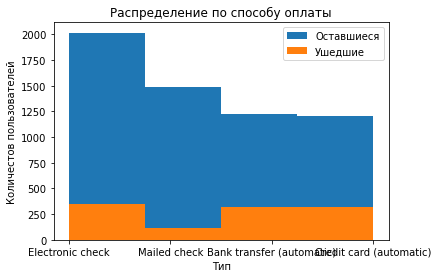

In [44]:
plt.hist(df.loc[df['enddate']==0]['paymentmethod'], bins=4)
plt.hist(df.loc[df['enddate']==1]['paymentmethod'], bins=4)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по способу оплаты')
plt.xlabel('Тип')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По наличию способу оплаты клиенты делятся на 4 группы: электронным чеком, автоматическим списанием с кредитки, автоматическим банковским банковским переводом и бумажным чеком. (Доли примерно 2/1/1/1)
    2. Большая часть клиентов выбирает электронного электронный чек.
    3. Распредедения клиентов по типам среди оставшихся и среди ушедших очень похожи.

In [45]:
# Далее: MonthlyCharges . В этом признаке указана сумма списаний за месяц. Рассмотрим значения:
df['monthlycharges'].value_counts()

20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1584, dtype: int64

Значения не столь типичны (не ситуация 3-4 абонентский плат по тарифам). Используем график для неприрывной переменной.

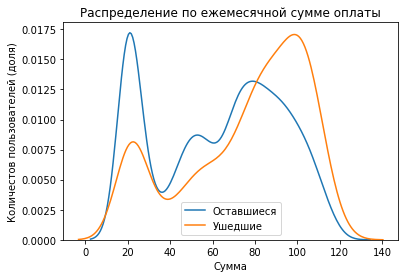

In [46]:
sns.kdeplot(df.loc[df['enddate']==0]['monthlycharges'])
sns.kdeplot(df.loc[df['enddate']==1]['monthlycharges'])
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по ежемесячной сумме оплаты')
plt.xlabel('Сумма')
plt.ylabel('Количестов пользователей (доля)')
plt.show()

Мы видим, что:

    1. Распределение суммы оплаты по оставшимся пользователям имеет 2 пика.
    2. Распределение суммы оплаты по ушедшим смешено вправо (в сторону большей суммы) 
    3. Распредедения клиентов по сумме оплаты среди оставшихся и среди ушедших отличаются.

In [47]:
# Далее: TotalCharges. В этом признаке указана общая сумма списаний за время пользования. Рассмотрим значения:
df['totalcharges'].value_counts()


20.45      6
101.00     5
21.53      4
1007.50    4
732.60     4
          ..
4357.50    1
3509.55    1
2530.80    1
2599.10    1
7251.82    1
Name: totalcharges, Length: 6657, dtype: int64

Рассматриваем аналогично предыдущему пункту

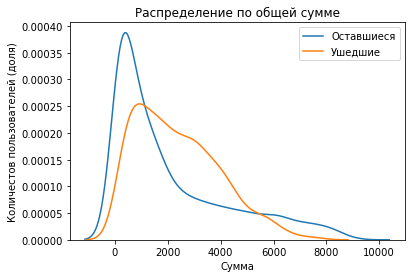

In [48]:
sns.kdeplot(df.loc[df['enddate']==0]['totalcharges'])
sns.kdeplot(df.loc[df['enddate']==1]['totalcharges'])
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по общей сумме')
plt.xlabel('Сумма')
plt.ylabel('Количестов пользователей (доля)')
plt.show()

In [49]:
# Далее: gender. В этом признаке указан пол клиента. Рассмотрим значения:
df['gender']. value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

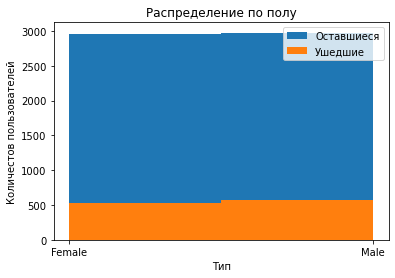

In [50]:
plt.hist(df.loc[df['enddate']==0]['gender'], bins=2)
plt.hist(df.loc[df['enddate']==1]['gender'], bins=2)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по полу')
plt.xlabel('Тип')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По наличию полу клиенты делятся на 2 группы:мужчины и женщины примерно поровну.
    2. Распредедение клиентов по полу чуть-чуть отличается у оставшихся и ушедших. 

In [51]:
# Далее: SeniorCitizen. В этом признаке указано пенсионер ли наш клиент. Рассмотрим значения:
df['seniorcitizen'].value_counts()

0    5890
1    1142
Name: seniorcitizen, dtype: int64

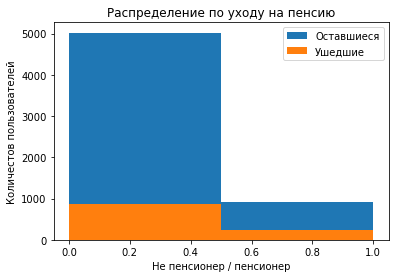

In [52]:
plt.hist(df.loc[df['enddate']==0]['seniorcitizen'], bins=2)
plt.hist(df.loc[df['enddate']==1]['seniorcitizen'], bins=2)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по уходу на пенсию')
plt.xlabel('Не пенсионер / пенсионер')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По части выхода на пенсию клиенты делятся на 2 группы: вышли / не вышли в отношении примерно 4 /1.
    2. Распредедение клиентов  у оставшихся и ушедших одинаковое. 

In [53]:
# Далее: partner. В этом признаке указано наличие супруга/супруги. Рассмотрим значения:
df['partner'].value_counts()

No     3639
Yes    3393
Name: partner, dtype: int64

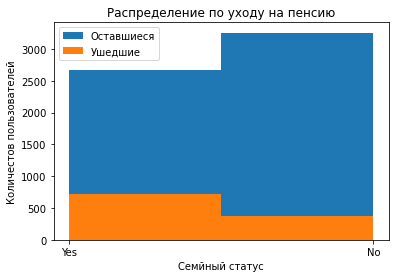

In [54]:
plt.hist(df.loc[df['enddate']==0]['partner'], bins=2)
plt.hist(df.loc[df['enddate']==1]['partner'], bins=2)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по уходу на пенсию')
plt.xlabel('Семйный статус')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

    1. По наличию супруга клиенты делятся на 2 группы: есть и нет примерно поровну.
    2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших. 

In [55]:
# Далее: dependents. В этом признаке указано наличие иждевенцев. Рассмотрим значения:
df['dependents'].value_counts()

No     4933
Yes    2099
Name: dependents, dtype: int64

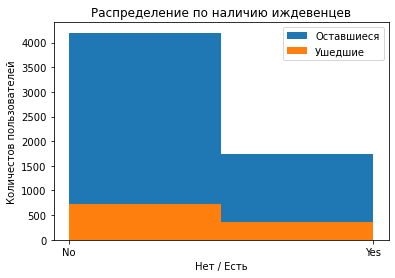

In [56]:
plt.hist(df.loc[df['enddate']==0]['dependents'], bins=2)
plt.hist(df.loc[df['enddate']==1]['dependents'], bins=2)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение по наличию иждевенцев')
plt.xlabel('Нет / Есть')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По наличию иждевенцев клиенты делятся на 2 группы: есть и нет в пропорции примерно 2.5 / 1.
2. Распредедение клиентов по этому признаку не отличается у оставшихся и ушедших. 

In [57]:
# Далее: multipleLines. В этом признаке указана возможность завести несколько линий. Рассмотрим значения:
df['multiplelines'].value_counts()

No         3385
Yes        2967
no_info     680
Name: multiplelines, dtype: int64

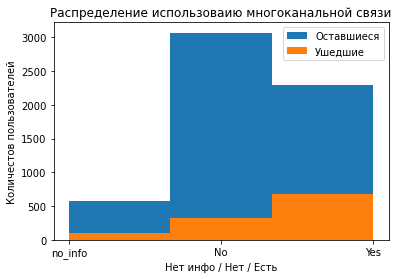

In [58]:
plt.hist(df.loc[df['enddate']==0]['multiplelines'], bins=3)
plt.hist(df.loc[df['enddate']==1]['multiplelines'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение использоваию многоканальной связи')
plt.xlabel('Нет инфо / Нет / Есть')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По наличию многоканальной связи клиенты делятся на 2 группы: есть и нет.
2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших.

In [59]:
# Далее: internetservice. В этом признаке указана технология проведения интернета. Рассмотрим значения:
df['internetservice'].value_counts()

Fiber optic    3096
DSL            2416
no_info        1520
Name: internetservice, dtype: int64

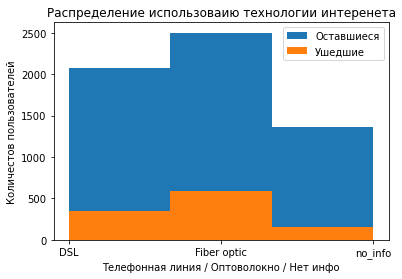

In [60]:
plt.hist(df.loc[df['enddate']==0]['internetservice'], bins=3)
plt.hist(df.loc[df['enddate']==1]['internetservice'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение использоваию технологии интеренета')
plt.xlabel('Телефонная линия / Оптоволокно / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По технологиям интернета  клиенты делятся на 2 группы: по телефонной линии и по оптоволокну. Вторых почти в 2 раза больше.
2. Распредедение клиентов по этому признаку не отличается у оставшихся и ушедших.

In [61]:
# Далее: onlinesecurity. В этом признаке указано, пользуются ли клиенты блокировками. Рассмотрим значения:
df['onlinesecurity'].value_counts()

No         3497
Yes        2015
no_info    1520
Name: onlinesecurity, dtype: int64

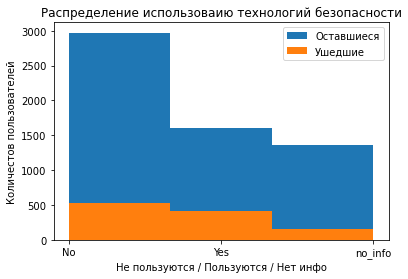

In [62]:
plt.hist(df.loc[df['enddate']==0]['onlinesecurity'], bins=3)
plt.hist(df.loc[df['enddate']==1]['onlinesecurity'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение использоваию технологий безопасности')
plt.xlabel('Не пользуются / Пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По использованию технологий безопасности клиенты делятся на 2 группы: пользуются / не пользуются. Вторых почти в 2 раза больше.
2. Распредедение клиентов по этому признаку не отличается у оставшихся и ушедших.

In [63]:
# Далее: onlinebackup. В этом признаке указано, пользуются ли клиенты облачным хранилищем. Рассмотрим значения:
df['onlinebackup'].value_counts()

No         3087
Yes        2425
no_info    1520
Name: onlinebackup, dtype: int64

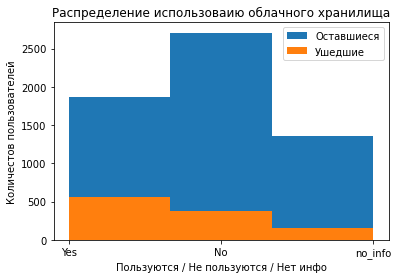

In [64]:
plt.hist(df.loc[df['enddate']==0]['onlinebackup'], bins=3)
plt.hist(df.loc[df['enddate']==1]['onlinebackup'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение использоваию облачного хранилища')
plt.xlabel('Пользуются / Не пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По облачного хранилища клиенты делятся на 2 группы: пользователей примерно на четверть больше.
2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших.

In [65]:
# Далее:  deviceprotection. В этом признаке указано, пользуются ли клиенты антивирусом. Рассмотрим значения:
df['deviceprotection'].value_counts()

No         3094
Yes        2418
no_info    1520
Name: deviceprotection, dtype: int64

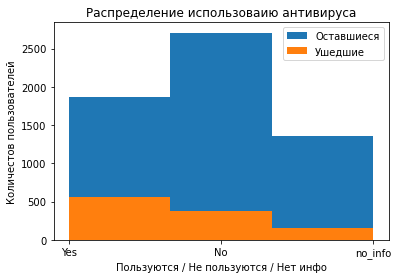

In [66]:
plt.hist(df.loc[df['enddate']==0]['onlinebackup'], bins=3)
plt.hist(df.loc[df['enddate']==1]['onlinebackup'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение использоваию антивируса')
plt.xlabel('Пользуются / Не пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По использованию антивируса клиенты делятся на 2 группы: пользователей примерно на четверть больше.
2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших.

In [67]:
# Далее: techsupport. В этом признаке указано, пользуются ли клиенты линией техподдержки. Рассмотрим значения:
df['techsupport'].value_counts()

No         3472
Yes        2040
no_info    1520
Name: techsupport, dtype: int64

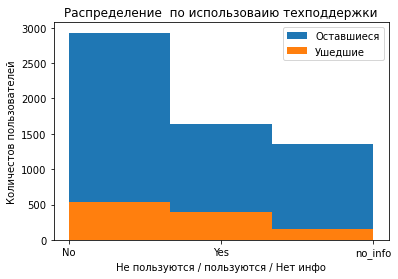

In [68]:
plt.hist(df.loc[df['enddate']==0]['techsupport'], bins=3)
plt.hist(df.loc[df['enddate']==1]['techsupport'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение  по использоваию техподдержки')
plt.xlabel('Не пользуются / пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По использованию техподдержки клиенты делятся на 2 группы: пользователей примерно в 2 раза больше.
2. Распредедение клиентов по этому признаку не отличается у оставшихся и ушедших.

In [69]:
# Далее: streamingtv. В этом признаке указано, пользуются ли клиенты телевиденеим. Рассмотрим значения:
df['streamingtv'].value_counts()

No         2809
Yes        2703
no_info    1520
Name: streamingtv, dtype: int64

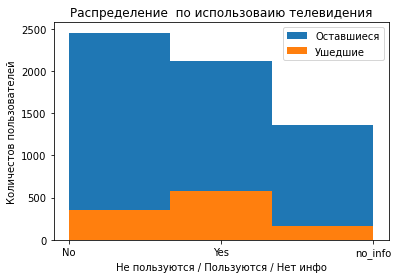

In [70]:
plt.hist(df.loc[df['enddate']==0]['streamingtv'], bins=3)
plt.hist(df.loc[df['enddate']==1]['streamingtv'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение  по использоваию телевидения')
plt.xlabel('Не пользуются / Пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По использованию телевидения клиенты делятся на 2 группы: их примерно поровну.
2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших.

In [71]:
# Далее: streamingmovies. В этом признаке указано, пользуются ли клиенты каталогом фильмов. Рассмотрим значения:
df['streamingmovies'].value_counts()

No         2781
Yes        2731
no_info    1520
Name: streamingmovies, dtype: int64

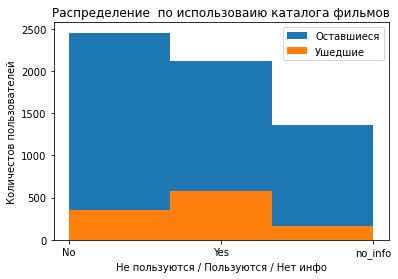

In [72]:
plt.hist(df.loc[df['enddate']==0]['streamingtv'], bins=3)
plt.hist(df.loc[df['enddate']==1]['streamingtv'], bins=3)
plt.legend(['Оставшиеся', 'Ушедшие'])

plt.title('Распределение  по использоваию каталога фильмов')
plt.xlabel('Не пользуются / Пользуются / Нет инфо')
plt.ylabel('Количестов пользователей')
plt.show()

Мы видим, что:

1. По использованию каталога фильмов клиенты делятся на 2 группы: их примерно поровну.
2. Распредедение клиентов по этому признаку отличается у оставшихся и ушедших.

#### Анализ на мультиколлинеарность

In [73]:
df.phik_matrix()

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'seniorcitizen', 'length']


C:\Users\krulo\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable customerid is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customerid can be slow.
  warnings.warn(


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,length
customerid,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
begindate,1.0,1.000000,0.461977,0.765275,0.078664,0.467586,0.421848,0.773731,0.018540,0.049516,...,0.201169,0.468346,0.185601,0.459336,0.495096,0.501372,0.454019,0.418173,0.429770,0.978241
enddate,1.0,0.461977,1.000000,0.094622,0.082789,0.214300,0.225823,0.303758,0.008800,0.085708,...,0.048710,0.105172,0.056279,0.058630,0.089771,0.085665,0.051442,0.078554,0.086371,0.374101
type,1.0,0.765275,0.094622,1.000000,0.106151,0.277528,0.388557,0.470700,0.000000,0.085800,...,0.146126,0.244802,0.503776,0.636227,0.580887,0.630968,0.671126,0.548723,0.553780,0.635623
paperlessbilling,1.0,0.078664,0.082789,0.106151,1.000000,0.368945,0.467547,0.202168,0.000000,0.241715,...,0.170650,0.100063,0.231145,0.208084,0.195065,0.195398,0.200363,0.204617,0.202005,0.018839
paymentmethod,1.0,0.467586,0.214300,0.277528,0.368945,1.000000,0.398849,0.334563,0.000000,0.291989,...,0.222859,0.174953,0.323013,0.314888,0.292646,0.297187,0.316805,0.283902,0.284844,0.348275
monthlycharges,1.0,0.421848,0.225823,0.388557,0.467547,0.398849,1.000000,0.711015,0.005522,0.304546,...,0.182283,0.710293,0.919005,0.812548,0.818861,0.827363,0.816645,0.864821,0.863544,0.387649
totalcharges,1.0,0.773731,0.303758,0.470700,0.202168,0.334563,0.711015,1.000000,0.000000,0.136856,...,0.085809,0.467826,0.489363,0.516500,0.550605,0.558748,0.527978,0.555663,0.554074,0.847572
gender,1.0,0.018540,0.008800,0.000000,0.000000,0.000000,0.005522,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
seniorcitizen,1.0,0.049516,0.085708,0.085800,0.241715,0.291989,0.304546,0.136856,0.000000,1.000000,...,0.323629,0.087978,0.160452,0.127108,0.109855,0.110029,0.135073,0.111610,0.113611,0.065128


interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'seniorcitizen', 'length']


C:\Users\krulo\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable customerid is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customerid can be slow.
  warnings.warn(


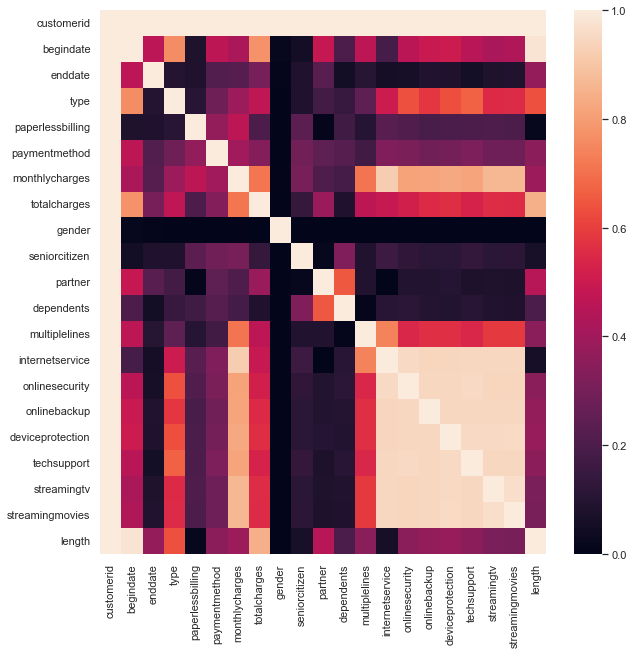

In [74]:

sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(df.phik_matrix())

plt.show()

#### Анализ на мультиколлинеарность: выводы

    1. Из-за неинформативности можно будет удалить столбец customerID
    2. Нулевую или очень близку к нулевой корреляцию показыват столбеw gender
    3. Пул интернет-сервисов показыват очень высокую крееляцию друг с другом. Вероятно, они продавались пакетом или шли в качестве подарка для удержания также пакетом

#### Исследовательский анализ данных: выводы

    1. Мы определили целевой показатель нашего исследования и свели проект к решению задачи бинарной классификации.
    2. Анализ целевого показателя указывает на дисбалланс классов. Будем разбиратся с ним позднее. 
    3. С инструментальной точки зрения далее мы будем работать с неприрывными и категориальными (бинарными) перменными.
    
    4. Есть ряд признаков, в которых распределение оставшихся и ушедших клиентов совпадают, среди них:
            type (периодичность оплаты)
            paperlessbilling (возможность получить электронный платежный документ)
            paymentmethod (способ оплаты)
            seniorcitizen (наличие пенсионного статуса)
            dependents (наличие иждевенцев)
            multiplelines (наличие многоканальной связи)
            internetservice (технология проведения интеренета)
            onlinesecurity (блокировка нежелательных сайтов)
            techsupport (обращения в тех поддержку)
            
    5. Есть ряд признаков, в которых распределение оставшихся и ушедших клиентов НЕ совпадают, среди них:
            monthlycharges (сумма ежемесячной оплаты)
            totalcharges (общая сумма трат на сервисы)
            gender (пол)
            partner (наличие супруги / супруга)
            onlinebackup (использование облачного хранилища)
            deviceprotection (использование антивируса)
            streamingtv (использование телевидения)
            streamingmovies (использование каталога фильмов)

## Построение моделей


### Подготовка признаков

Для работы модели будет быстрее и удобнее работать с числовым выражением признаков. Поэтому сейчас мы закодируем признаки в числа.

In [75]:
# время начала обслуживания и customerID удалим как неинформативные
df = df.drop(['customerid','gender', 'begindate'], axis=1)

In [76]:
# приведем таргет в цифровой вид
df['enddate'] = df['enddate'].astype('int')

In [77]:
# Сформируем признаки и целевой показатель
features =df.drop(['enddate'], axis=1)
target = df['enddate']

In [78]:
# Формируем обучающую и тестовую выборки
# Проверяем их по форме


features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, \
                                                                              random_state=RANDOM_STATE)


#features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size = 0.25, random_state=RANDOM_STATE)

print(features_train.shape)
print(target_train.shape)
print()
#print(features_valid.shape)
#print(target_valid.shape)
#print()
print(features_test.shape)
print(target_test.shape)

(5274, 17)
(5274,)

(1758, 17)
(1758,)


In [79]:
from sklearn. preprocessing import OneHotEncoder

In [80]:
### Запускаем Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
# Указываем модели для прогнозирования

clf1 = DecisionTreeClassifier(random_state=RANDOM_STATE)

clf2 = RandomForestClassifier(random_state=RANDOM_STATE)

clf3 = CatBoostClassifier(random_state=RANDOM_STATE)

clf4 = LogisticRegression(random_state=RANDOM_STATE)

In [82]:

df['seniorcitizen ']=df['seniorcitizen'].astype('str')

In [83]:

from sklearn.compose import ColumnTransformer


categorical_features = features_train.select_dtypes(include='object').columns
numeric_features = features_train.select_dtypes(exclude='object').columns

param1 = {}
param1['classifier__max_depth'] = [2,4,6,8,10,12]
param1['classifier__min_samples_split'] = [2,5,10]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__n_estimators'] = [10,20,30,40,50]
param2['classifier__max_depth'] = [6,8,10,12]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__max_depth'] = [4,6,8,10,12]
# param3['classifier__n_estimators'] = [5,10,15,20]
param3['classifier__learning_rate'] = [0.003, 0.1, 0.3]
param3['classifier__iterations'] = [100,300, 500,1000]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__C'] = [0.5, 1.0, 1,5]
param4['classifier'] = [clf4]

preprocessor = ColumnTransformer([('cat',  OneHotEncoder(drop='first',handle_unknown="ignore"), categorical_features),
                       ('num', StandardScaler(),numeric_features)])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf1)]
)
params = [param1, param2, param3, param4]
model = GridSearchCV(pipe, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(features_train, target_train)

0:	learn: 0.6321742	total: 149ms	remaining: 2m 28s
1:	learn: 0.5812007	total: 155ms	remaining: 1m 17s
2:	learn: 0.5376595	total: 159ms	remaining: 52.9s
3:	learn: 0.5024701	total: 164ms	remaining: 40.7s
4:	learn: 0.4710785	total: 168ms	remaining: 33.5s
5:	learn: 0.4488699	total: 172ms	remaining: 28.6s
6:	learn: 0.4288354	total: 180ms	remaining: 25.6s
7:	learn: 0.4123054	total: 185ms	remaining: 22.9s
8:	learn: 0.4018173	total: 189ms	remaining: 20.8s
9:	learn: 0.3908370	total: 193ms	remaining: 19.1s
10:	learn: 0.3811118	total: 198ms	remaining: 17.8s
11:	learn: 0.3742069	total: 202ms	remaining: 16.6s
12:	learn: 0.3667193	total: 206ms	remaining: 15.7s
13:	learn: 0.3616763	total: 211ms	remaining: 14.8s
14:	learn: 0.3571354	total: 215ms	remaining: 14.1s
15:	learn: 0.3541801	total: 219ms	remaining: 13.5s
16:	learn: 0.3514561	total: 224ms	remaining: 13s
17:	learn: 0.3482752	total: 228ms	remaining: 12.5s
18:	learn: 0.3451838	total: 233ms	remaining: 12s
19:	learn: 0.3439241	total: 237ms	remaining

198:	learn: 0.2329355	total: 1.03s	remaining: 4.16s
199:	learn: 0.2322678	total: 1.04s	remaining: 4.15s
200:	learn: 0.2315573	total: 1.04s	remaining: 4.14s
201:	learn: 0.2307615	total: 1.05s	remaining: 4.14s
202:	learn: 0.2299793	total: 1.05s	remaining: 4.13s
203:	learn: 0.2295714	total: 1.06s	remaining: 4.12s
204:	learn: 0.2292412	total: 1.06s	remaining: 4.11s
205:	learn: 0.2287516	total: 1.06s	remaining: 4.1s
206:	learn: 0.2279531	total: 1.07s	remaining: 4.09s
207:	learn: 0.2276389	total: 1.07s	remaining: 4.09s
208:	learn: 0.2273355	total: 1.08s	remaining: 4.08s
209:	learn: 0.2270251	total: 1.08s	remaining: 4.07s
210:	learn: 0.2268612	total: 1.08s	remaining: 4.06s
211:	learn: 0.2267382	total: 1.09s	remaining: 4.05s
212:	learn: 0.2261174	total: 1.09s	remaining: 4.04s
213:	learn: 0.2254963	total: 1.1s	remaining: 4.03s
214:	learn: 0.2248740	total: 1.1s	remaining: 4.03s
215:	learn: 0.2243849	total: 1.11s	remaining: 4.02s
216:	learn: 0.2236529	total: 1.11s	remaining: 4.01s
217:	learn: 0.2

394:	learn: 0.1698403	total: 1.92s	remaining: 2.94s
395:	learn: 0.1696728	total: 1.92s	remaining: 2.93s
396:	learn: 0.1694235	total: 1.93s	remaining: 2.93s
397:	learn: 0.1690762	total: 1.93s	remaining: 2.92s
398:	learn: 0.1689623	total: 1.94s	remaining: 2.92s
399:	learn: 0.1687850	total: 1.94s	remaining: 2.92s
400:	learn: 0.1685263	total: 1.95s	remaining: 2.91s
401:	learn: 0.1684308	total: 1.95s	remaining: 2.9s
402:	learn: 0.1681873	total: 1.96s	remaining: 2.9s
403:	learn: 0.1673935	total: 1.96s	remaining: 2.89s
404:	learn: 0.1673255	total: 1.97s	remaining: 2.89s
405:	learn: 0.1672544	total: 1.97s	remaining: 2.88s
406:	learn: 0.1671589	total: 1.98s	remaining: 2.88s
407:	learn: 0.1670793	total: 1.98s	remaining: 2.87s
408:	learn: 0.1667912	total: 1.98s	remaining: 2.87s
409:	learn: 0.1666628	total: 1.99s	remaining: 2.86s
410:	learn: 0.1665619	total: 1.99s	remaining: 2.85s
411:	learn: 0.1661082	total: 2s	remaining: 2.85s
412:	learn: 0.1658881	total: 2s	remaining: 2.85s
413:	learn: 0.165579

590:	learn: 0.1369932	total: 2.8s	remaining: 1.94s
591:	learn: 0.1368112	total: 2.8s	remaining: 1.93s
592:	learn: 0.1366553	total: 2.81s	remaining: 1.93s
593:	learn: 0.1365878	total: 2.81s	remaining: 1.92s
594:	learn: 0.1364144	total: 2.82s	remaining: 1.92s
595:	learn: 0.1363705	total: 2.82s	remaining: 1.91s
596:	learn: 0.1363319	total: 2.83s	remaining: 1.91s
597:	learn: 0.1359355	total: 2.83s	remaining: 1.9s
598:	learn: 0.1357311	total: 2.83s	remaining: 1.9s
599:	learn: 0.1356826	total: 2.84s	remaining: 1.89s
600:	learn: 0.1354879	total: 2.84s	remaining: 1.89s
601:	learn: 0.1354138	total: 2.85s	remaining: 1.88s
602:	learn: 0.1353834	total: 2.85s	remaining: 1.88s
603:	learn: 0.1353348	total: 2.86s	remaining: 1.87s
604:	learn: 0.1351850	total: 2.86s	remaining: 1.87s
605:	learn: 0.1350599	total: 2.86s	remaining: 1.86s
606:	learn: 0.1349165	total: 2.87s	remaining: 1.86s
607:	learn: 0.1348802	total: 2.87s	remaining: 1.85s
608:	learn: 0.1347512	total: 2.88s	remaining: 1.85s
609:	learn: 0.13

788:	learn: 0.1151483	total: 3.68s	remaining: 984ms
789:	learn: 0.1150659	total: 3.68s	remaining: 979ms
790:	learn: 0.1149735	total: 3.69s	remaining: 975ms
791:	learn: 0.1148433	total: 3.69s	remaining: 970ms
792:	learn: 0.1147993	total: 3.7s	remaining: 965ms
793:	learn: 0.1146812	total: 3.7s	remaining: 960ms
794:	learn: 0.1145642	total: 3.71s	remaining: 956ms
795:	learn: 0.1144388	total: 3.71s	remaining: 951ms
796:	learn: 0.1143725	total: 3.71s	remaining: 946ms
797:	learn: 0.1142658	total: 3.72s	remaining: 941ms
798:	learn: 0.1142304	total: 3.72s	remaining: 937ms
799:	learn: 0.1140732	total: 3.73s	remaining: 932ms
800:	learn: 0.1140007	total: 3.73s	remaining: 927ms
801:	learn: 0.1139122	total: 3.74s	remaining: 922ms
802:	learn: 0.1137844	total: 3.74s	remaining: 918ms
803:	learn: 0.1135563	total: 3.74s	remaining: 913ms
804:	learn: 0.1134350	total: 3.75s	remaining: 908ms
805:	learn: 0.1133238	total: 3.75s	remaining: 903ms
806:	learn: 0.1131718	total: 3.76s	remaining: 899ms
807:	learn: 0.

977:	learn: 0.0991451	total: 4.57s	remaining: 103ms
978:	learn: 0.0990719	total: 4.57s	remaining: 98ms
979:	learn: 0.0990296	total: 4.58s	remaining: 93.4ms
980:	learn: 0.0989370	total: 4.58s	remaining: 88.7ms
981:	learn: 0.0988137	total: 4.58s	remaining: 84ms
982:	learn: 0.0987720	total: 4.59s	remaining: 79.4ms
983:	learn: 0.0987158	total: 4.59s	remaining: 74.7ms
984:	learn: 0.0985763	total: 4.6s	remaining: 70.1ms
985:	learn: 0.0984815	total: 4.61s	remaining: 65.4ms
986:	learn: 0.0984345	total: 4.61s	remaining: 60.7ms
987:	learn: 0.0983817	total: 4.61s	remaining: 56ms
988:	learn: 0.0983438	total: 4.62s	remaining: 51.4ms
989:	learn: 0.0982946	total: 4.62s	remaining: 46.7ms
990:	learn: 0.0982152	total: 4.63s	remaining: 42ms
991:	learn: 0.0981132	total: 4.63s	remaining: 37.4ms
992:	learn: 0.0980324	total: 4.64s	remaining: 32.7ms
993:	learn: 0.0980079	total: 4.64s	remaining: 28ms
994:	learn: 0.0979157	total: 4.65s	remaining: 23.3ms
995:	learn: 0.0978771	total: 4.65s	remaining: 18.7ms
996:	

In [84]:
# Выведем лучшую модель
#best_model =model.best_estimator_
#best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['type', 'paperlessbilling', 'paymentmethod', 'partner', 'dependents',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['monthlycharges', 'totalcharges', 'seniorcitizen', 'length'], dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000195A8383A00>)])

In [85]:
model.best_params_

{'classifier': <catboost.core.CatBoostClassifier at 0x195a84b11f0>,
 'classifier__iterations': 1000,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 4}

In [86]:
# ROC-AUC на обучении
model.best_score_

0.9156257167587426

## Тестирование

Лучшей моделью по итогам обучения оказался Cat Boost, протестируем ее.
 

In [87]:
preds = best_model.predict(features_test)

In [88]:


probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

In [89]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('Значение метрики ROC_AUC:', auc_roc)

Значение метрики ROC_AUC: 0.910728869994974


### Визуализируем ROC-кривую

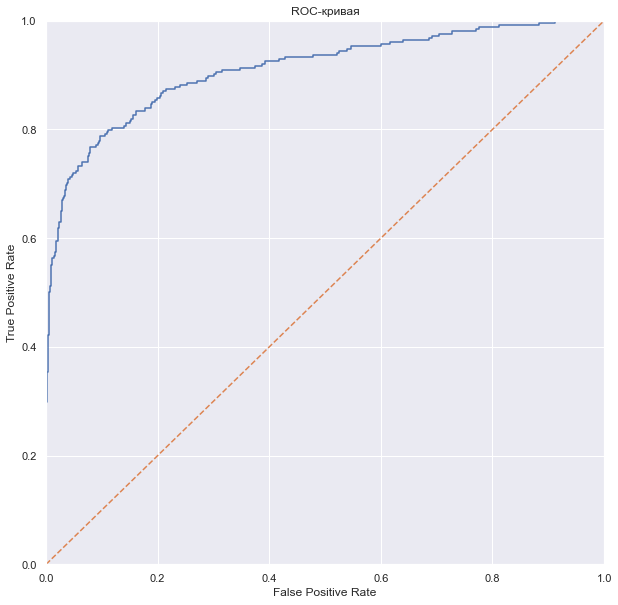

In [90]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate" )
plt.title("ROC-кривая")

plt.show()

### Рассмотрим матрицу ошибок

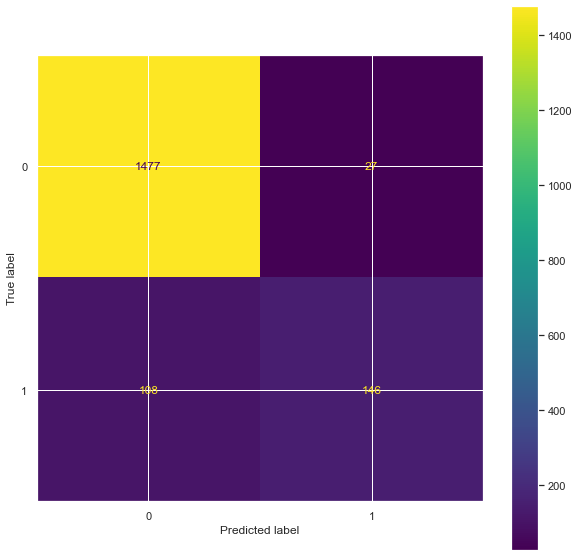

In [91]:
cm = confusion_matrix(target_test, preds)
 
cm_display = ConfusionMatrixDisplay(cm).plot()

In [92]:
print('Полнота', recall_score(target_test, preds))
print('Точность', precision_score(target_test, preds))

Полнота 0.5748031496062992
Точность 0.8439306358381503


### Установим важность признаков

In [93]:

feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
coefs =  best_model[-1].feature_importances_
importances=pd.Series(coefs, index=feature_names)
importances.sort_values(ascending=False)

num__length                                   54.929845
num__monthlycharges                           11.328475
num__totalcharges                              9.418878
cat__type_Two year                             3.786559
cat__partner_Yes                               3.143688
cat__multiplelines_Yes                         1.880751
cat__type_One year                             1.691174
cat__onlinebackup_Yes                          1.491924
cat__paymentmethod_Mailed check                1.438878
cat__dependents_Yes                            1.366369
cat__deviceprotection_Yes                      1.229700
cat__paymentmethod_Credit card (automatic)     1.118432
cat__techsupport_Yes                           1.068560
cat__paymentmethod_Electronic check            1.041086
cat__paperlessbilling_Yes                      0.975812
cat__streamingmovies_Yes                       0.909360
num__seniorcitizen                             0.811731
cat__onlinesecurity_Yes                        0

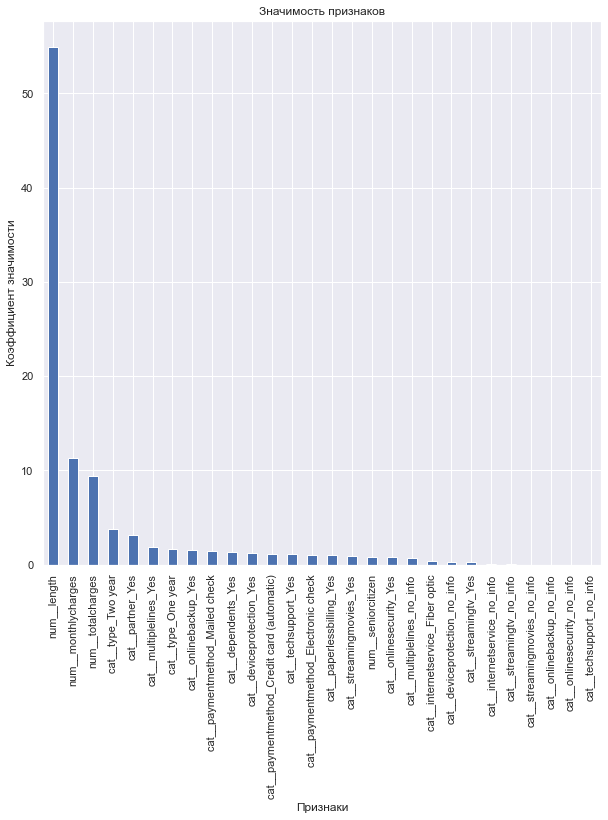

In [94]:
importances.sort_values(ascending=False).plot(kind='bar')

plt.title('Значимость признаков')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент значимости')

plt.show()

### Выводы по тестированию

1. Мы получили значение AUC_ROC на уровне 0.91 

2. Точность и полнота на хорошем уровне.  
3. Множество попаданий в отрицательный класс связано просто с его большим количестовм
4. По итогам анализа важности признаков можно увидеть что наибольший "вклад" в результаты модели внесли следующие признаки: 

        время пользования услугами
        сумма ежемесячных платежей
        общая сумма платежей

## Выводы по проекту:

    1. Для анализа поступило 4 таблицы с различными данными пользователей телеком-компании. На этапе предобработки данных:
            провели объединение по общему столбцу "customerID" 
            проверили и удалили пропусков
            заполненили образовавшиесяя пропуски заглушками
            добавили еще один признак - время пользования услугами

    2. На этапе анализа данных:
            определили целевой прихнак
            рассмотрели распределения признаков в сравнении для оставшихся и ушедших клиентов
            рассмотрели матрицу корреляции и на ее основании удалили неинформатиыные признаки
    
    3. На этапе моделирования:
            разделили данные на обучающие и тренировочные
            определили структура пайплайна (OHE, StandardScaler, модели)
            выбрали несколько моделей классификации (дерево, лес, CatBoost и логистическая регрессия)
            описали гиперпараметры для перебора
            добавили обучение на кросс-валидации
            
     4. На этапе тестирования:
             построили ROC-кривую
             построии cofusion_matrix
             вывели занчения для полноты и точности
             построили таблицу важность признаков и визуализировали ее
             
     Поставленная задача выполнена.
             
            
        